In [3]:
#import and prepare each dataset for statistical analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_csv("file:///Users//erynrigley//Downloads//SocialClass.csv") #social classes
ds = ds.drop(columns = 'Irish Speakers')
ds = ds.drop(columns = 'Non-Irish Speakers')
ds = ds.drop(columns = 'Not Stated')
ds = ds[['Irish Speakers(%)', 'Year', 'Area', 'Sex', 'Social Class', 'Population']]
ds.columns = ['IrishSpeakers', 'Year', 'Area', 'Sex', 'SocialClass', 'Population']

ds2 = pd.read_csv("file:///Users//erynrigley//Downloads//AgeGroup.csv") #age group
ds2 = ds2.drop(columns = 'Irish Speakers')
ds2 = ds2.drop(columns = 'Non-Irish Speakers')
ds2 = ds2.drop(columns = 'Not Stated')
ds2 = ds2[['Irish Speakers(%)', 'Year', 'Area', 'Age Group', 'Population']]
ds2.columns = ['IrishSpeakers', 'Year', 'Area', 'Age Group','Population']


ds3 = pd.read_csv("file:///Users//erynrigley//Downloads//Province.csv") #province and year
ds3 = ds3.drop(columns = 'Irish Speakers')
ds3 = ds3.drop(columns = 'Non-Irish Speakers')
ds3 = ds3[['Irish Speakers(%)', 'Year', 'Province', 'Total Population']]
ds3.columns = ['IrishSpeakers', 'Year', 'Province', 'TotalPopulation']

# Irish Speakers

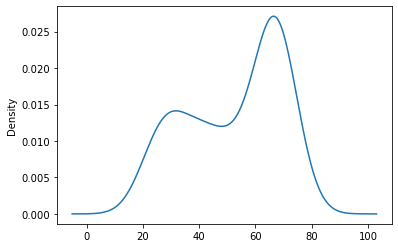

In [2]:
#density of Irish Speakers(%)

ds['IrishSpeakers'].plot.density()#.set_yscale("log")

IrishSpeakers    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

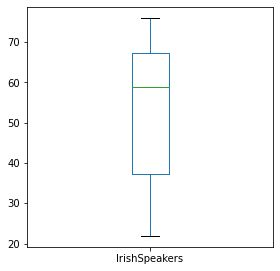

In [3]:
#box plot of Irish Speakers (%)

ds['IrishSpeakers'].plot(kind = 'box', figsize = (15,15), subplots = True, layout = (3,3))

Text(0.5, 1.0, 'Irish Speakers(%)')

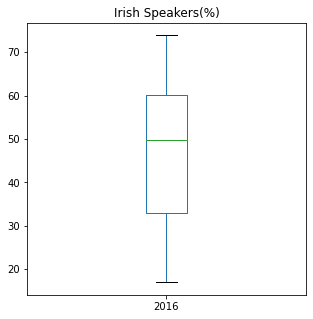

In [4]:
#update boxplot for most recent data available (2016)

Year = ds.groupby(['Year']).IrishSpeakers.describe()
Year.iloc[1].plot(kind = 'box', figsize = (5,5))
plt.title('Irish Speakers(%)')

In [5]:
Year.iloc[1] #2016

count    48.000000
mean     51.366667
std      16.950621
min      21.900000
25%      36.750000
50%      58.150000
75%      66.400000
max      73.900000
Name: 2016, dtype: float64

Density peaks around 70%, which is a considerable and suprisingly high amount. 

However, the box plot shows that the average is much lower than 70%, at around 60%. Using .describe(), we can see that the mean of Irish Speaker (%) in 2016 is 51%. 

We can see from this data, currently, around half of Irish people speak Irish. 

# Statistical Analysis of features

# 1. Year

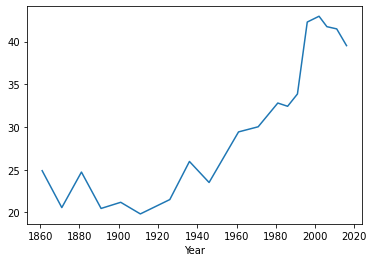

In [7]:
#group data by year and plot as line

yearspeak = ds3.groupby(['Year']).IrishSpeakers.describe()['mean']
yearspeak.plot.line()

Clearly, the number of Irish speakers can increased significantly over the past 100 years.

# 2. Social Class

Which social classes are there?

In [8]:
np.unique(ds['SocialClass'])

array(['All other gainfully occupied and unknown', 'All social classes',
       'Managerial and technical', 'Non-manual', 'Professional workers',
       'Semi-skilled', 'Skilled manual', 'Unskilled'], dtype=object)

How does social class influence Irish speakers?

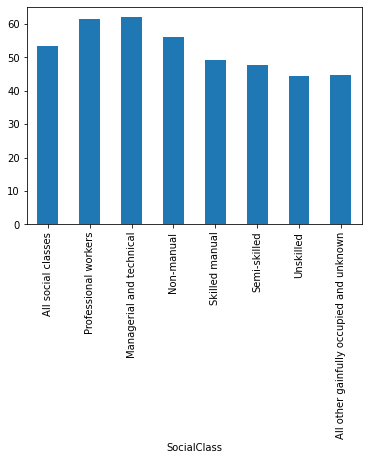

In [9]:
#group and reorder data by Social Class and analyse

socialclass = ds.groupby(['SocialClass']).IrishSpeakers.describe()['mean']
socialclass.reindex(['All social classes',
                        'Professional workers',
                        'Managerial and technical',
                        'Non-manual',
                        'Skilled manual',
                         'Semi-skilled',
                        'Unskilled',
                        'All other gainfully occupied and unknown']).plot(kind="bar")

With this re-ordered bar chart, we can see there is a trend for lower classes to speak Irish less than upper classes.

# 3. Age

In [10]:
#import data

Agegroup = ds2.groupby(['Age Group']).IrishSpeakers.describe()['mean']

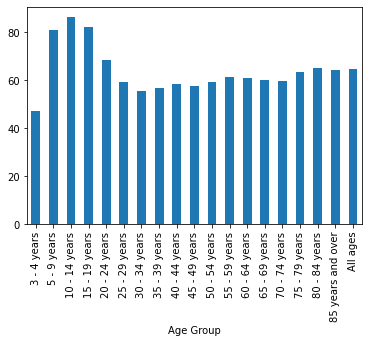

In [11]:
#reorder data by age group (chronologically)

Agegroup.reindex(['3 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', 
                  '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', 
                  '50 - 54 years', '55 - 59 years', '60 - 64 years',  '65 - 69 years', '70 - 74 years', 
                  '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages' ]).plot(kind="bar")

School age children speak Irish the most, which makes sense because they learn it at school. However, carrying on into adulthood, adults tend to drop down to average around 60%.

# 4. Area + 5. Population

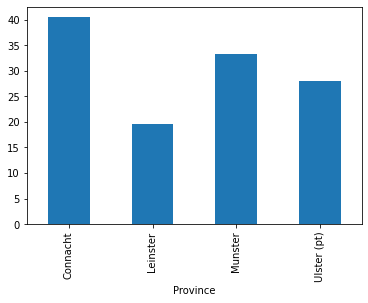

In [12]:
#import data, group and analyse
#Irish Speaking rates by Area

province = ds3.groupby(['Province']).IrishSpeakers.describe()['mean']
province = province.drop('State')
province.plot(kind = 'bar')

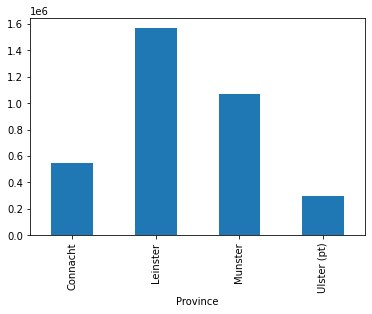

In [13]:
#repeat for population by province 

provincepop = ds3.groupby(['Province']).TotalPopulation.describe()
provincepop = provincepop['mean'].drop('State')
provincepop.plot(kind = 'bar')

There is a correlation with lower populated areas having higher percentages of irish speakers, except for Munster - which has a high population and high Irish Speaking population. 

Plot population to see more clearly

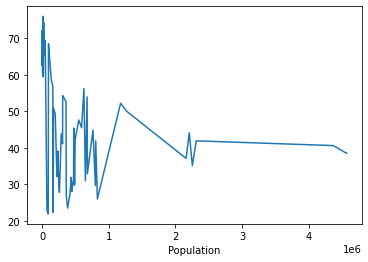

In [14]:
#group and plot population data

population = ds.groupby(['Population']).IrishSpeakers.describe()
population = population['mean']

population.plot.line()

Indeed, as we can see from this linegraph, there is a trend for Irish Speaking % to decrease, as population increases